<a href="https://colab.research.google.com/github/c0991100247/onthejobtraining20250315/blob/main/12_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this line is *new*

## add a header

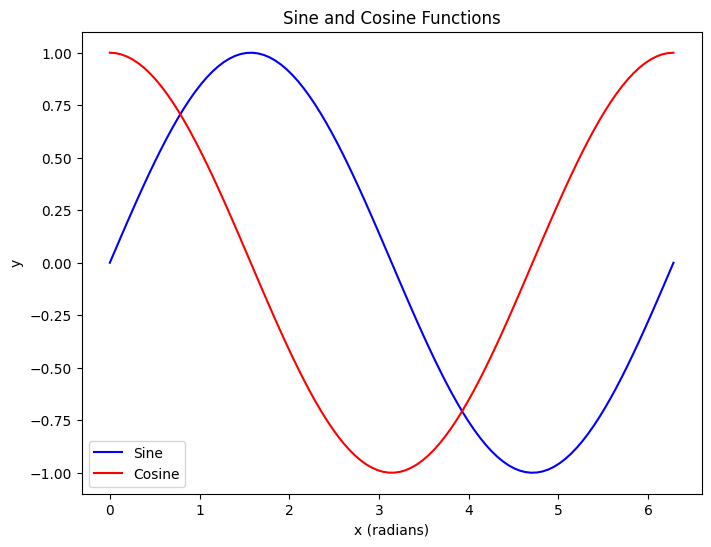

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of values for the x-axis
x = np.linspace(0, 2 * np.pi, 100)

# Compute the corresponding y-values for sine and cosine
y_sin = np.sin(x)
y_cos = np.cos(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_sin, label='Sine', color='blue')
plt.plot(x, y_cos, label='Cosine', color='red')

# Add labels and title
plt.title('Sine and Cosine Functions')
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()


2025-03-15 07:58:08.666093: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-15 07:58:08.669942: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-15 07:58:08.679076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742025488.693645   15456 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742025488.698003   15456 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742025488.711145   15456 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-03-15 07:58:14.993040: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
225/225 - 3s - 13ms/step - accuracy: 0.4150 - loss: 2.2637 - val_accuracy: 0.5114 - val_loss: 1.7806
Epoch 2/12
225/225 - 1s - 7ms/step - accuracy: 0.5425 - loss: 1.7232 - val_accuracy: 0.5893 - val_loss: 1.5775
Epoch 3/12
225/225 - 1s - 6ms/step - accuracy: 0.6061 - loss: 1.4990 - val_accuracy: 0.6260 - val_loss: 1.4788
Epoch 4/12
225/225 - 2s - 8ms/step - accuracy: 0.6626 - loss: 1.3114 - val_accuracy: 0.6611 - val_loss: 1.3591
Epoch 5/12
225/225 - 2s - 11ms/step - accuracy: 0.7026 - loss: 1.1473 - val_accuracy: 0.6678 - val_loss: 1.3570
Epoch 6/12
225/225 - 1s - 7ms/step - accuracy: 0.7275 - loss: 1.0414 - val_accuracy: 0.6984 - val_loss: 1.2713
Epoch 7/12
225/225 - 2s - 7ms/step - accuracy: 0.7516 - loss: 0.9255 - val_accuracy: 0.6956 - val_loss: 1.2848
Epoch 8/12
225/225 - 2s - 11ms/step - accuracy: 0.7646 - loss: 0.8766 - val_accuracy: 0.7101 - val_loss: 1.2658
Epoch 9/12
225/225 - 2s - 7ms/step - accuracy: 0.7816 - loss: 0.8052 - val_accuracy: 0.7117 - val_loss: 1.249

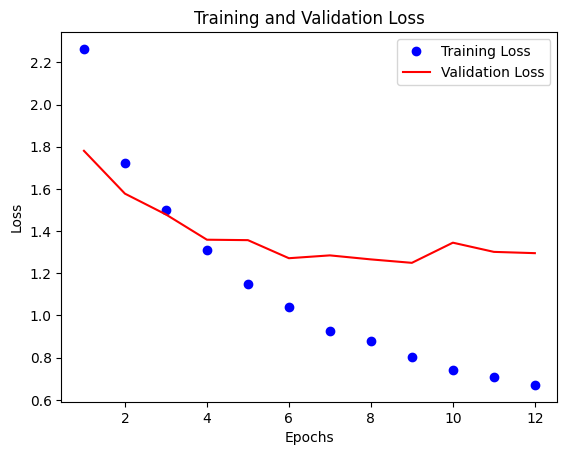

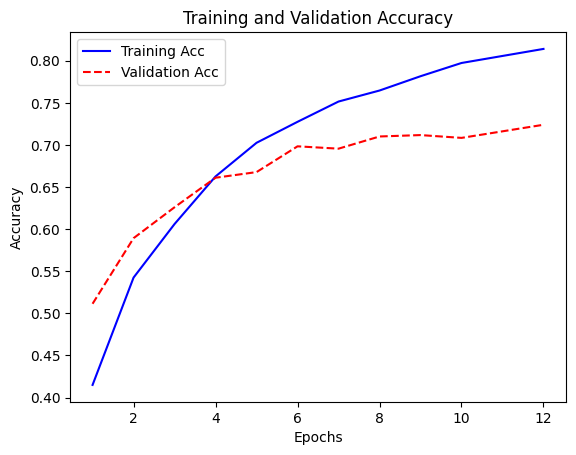

In [2]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

seed = 10
np.random.seed(seed)  # 指定亂數種子
# 載入Reuters資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 資料預處理
max_words = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# One-hot編碼
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.75))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(46, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
          epochs=12, batch_size=32, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()